#Objective: Learn more about  Simple Linear Regression by constructing a model that can predict salary based on years of experience.

Regression models are used for predicting a continuous outcome variable based on one or more predictor variable.

**Simple Linear Regression:**

$$
\hat{y} = \beta_0 + \beta_1 x
$$

where:

\begin{align*}
\hat{y} &: \text{Predicted value} \\
\beta_0 &: \text{Intercept} \\
\beta_1 &: \text{Slope} \\
x &: \text{Independent variable}
\end{align*}

##Import Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
from IPython import display
display.set_matplotlib_formats('svg') # Improve matplotlib visual quality

<ipython-input-29-dcd5f3b50b37>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # Improve matplotlib visual quality


##Import dataset

In [30]:
# This code goes to my Github repository and gets the salary dataset
!wget https://raw.githubusercontent.com/JudeIbeekeocha/Database_Repo/main/Salary_dataset.csv

--2024-06-29 12:28:46--  https://raw.githubusercontent.com/JudeIbeekeocha/Database_Repo/main/Salary_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 664 [text/plain]
Saving to: ‘Salary_dataset.csv’

Salary_dataset.csv  100%[===================>]     664  --.-KB/s    in 0s      

2024-06-29 12:28:46 (20.9 MB/s) - ‘Salary_dataset.csv’ saved [664/664]



In [37]:
salary_df = pd.read_csv('Salary_dataset.csv')
salary_df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


##Data Preprocessing

In [38]:
salary_df.drop('Unnamed: 0', axis=1, inplace=True)
salary_df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [51]:
# Extra brackets convert our 1D array to a 2D array which is required for the model
x = salary_df[['YearsExperience']].values
y = salary_df[['Salary']].values
x.shape, y.shape

((30, 1), (30, 1))

##Splitting data into Train & Test Set

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [53]:
x_train.shape, x_test.shape

((24, 1), (6, 1))

##Trainig the Simple Linear Regression Model

In [60]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print('The slope of our line is: ', regressor.coef_[0][0])
print('The y-intercept of our line is: ',regressor.intercept_[0])

The slope of our line is:  9312.575126729185
The y-intercept of our line is:  25849.841637955273


##Predicting on Test Set

In [62]:
pred = regressor.predict(x_test)
y_test, pred

(array([[ 37732.],
        [122392.],
        [ 57082.],
        [ 63219.],
        [116970.],
        [109432.]]),
 array([[ 40749.96184072],
        [122700.62295594],
        [ 64962.65717022],
        [ 63100.14214487],
        [115250.56285456],
        [107800.50275317]]))

##Calculate Mean Squared Error (MSE)

In [92]:
mse = mean_squared_error(y_test, pred)
unit_error = np.sqrt(mse)

print(f'The average error in our predicted salary (in dollars) is: {unit_error: .2f}')

The average error in our predicted salary (in dollars) is:  3580.98


##Visualizing our results

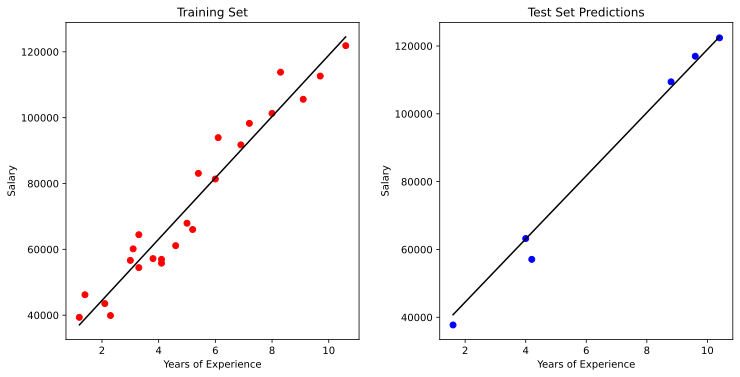

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

fig.tight_layout(w_pad=5)

# Trainaing set
ax[0].scatter(x_train, y_train, color='r')
ax[0].plot(x_train, regressor.predict(x_train), color='k')
ax[0].set_title('Training Set')
ax[0].set_xlabel('Years of Experience')
ax[0].set_ylabel('Salary')

# Test set
ax[1].scatter(x_test, y_test, color='b')
ax[1].plot(x_test, regressor.predict(x_test), color='k')
ax[1].set_title('Test Set Predictions')
ax[1].set_xlabel('Years of Experience')
ax[1].set_ylabel('Salary')

plt.show();